# **Introduction**

Machine learning has the potential to revolutionize agricultural plant nutrition prediction. Machine learning algorithms can identify patterns and correlations in data from various sources, such as soil sensors and weather stations, and use this information to make accurate predictions about crop nutrient needs. This information can help farmers make more informed fertilization decisions, reduce fertilizer use, save money, and reduce the environmental impact of nutrient run-off.

Furthermore, machine learning can assist in determining the optimal timing and amount of fertilization, as well as the types of nutrients that are most beneficial to various crops. Farmers may benefit from higher yields and profits as a result of this. We can look forward to a future in which technology plays a key role in ensuring food security for a growing global population while also making agriculture more sustainable, efficient, and profitable by collecting more data and refining the predictive models.



__________
# **I.Load Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aria_data.xlsx to aria_data.xlsx


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('aria_data.xlsx').round(2)

# create backup dataset
df_copy = df

In [ ]:
df.head(10)

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.60,199.00,391.33,371.73,466.80,273.13,742.07,4047.73,lab 1
1,5.00,263.20,194.60,393.67,348.53,401.80,220.07,712.00,4673.47,lab 1
2,4.91,247.27,205.80,375.47,354.87,419.00,222.13,677.20,4386.80,lab 1
3,4.77,257.94,191.83,368.72,334.67,417.22,195.94,678.56,4588.78,lab 1
4,4.89,258.20,195.73,356.67,333.33,394.60,196.00,677.13,4867.07,lab 1
5,4.88,268.72,193.00,364.94,345.89,405.44,210.06,650.67,4493.94,lab 1
6,4.55,255.87,182.13,359.47,326.80,389.47,191.87,632.27,4386.73,lab 1
7,4.74,248.93,203.93,365.20,332.93,390.93,202.20,664.00,4646.20,lab 1
8,4.72,269.00,191.47,381.20,353.20,403.53,217.80,714.53,4751.47,lab 1
9,4.72,268.27,178.80,370.00,342.47,384.53,204.73,690.33,4255.20,lab 1


In [ ]:
df.tail(10)

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
150,4.80,583.88,349.19,641.62,477.00,664.00,327.81,665.75,3917.62,lab 2
151,4.62,570.56,344.06,629.06,487.44,672.94,323.75,708.75,3889.38,lab 2
152,4.73,567.56,356.50,623.00,476.50,661.06,321.06,695.94,3858.50,lab 2
153,4.13,646.40,389.67,684.60,527.00,699.40,354.93,759.13,3895.40,lab 2
154,4.79,624.20,377.67,645.67,486.73,699.73,364.40,734.20,3741.27,lab 2
155,4.83,573.25,361.25,643.12,489.81,666.88,355.25,712.31,3943.69,lab 2
156,4.47,678.38,398.12,678.25,541.12,704.00,393.50,788.81,3928.19,lab 2
157,4.63,634.00,382.87,657.47,505.07,719.20,366.60,792.13,3861.20,lab 2
158,4.35,615.31,366.75,642.94,483.69,675.62,359.06,730.12,3859.06,lab 2
159,4.43,575.20,350.27,648.33,495.40,679.80,346.27,718.73,3903.33,lab 2


In [ ]:
# size data
print('Number of rows :' ,df.shape[0])
print('Number of columns :', df.shape[1])

Number of rows : 160
Number of columns : 10


In [ ]:
# missing value
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

In [ ]:
# check duplicate
df[df.duplicated()].shape

(0, 10)

In [ ]:
# numerical column
numcol = ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
catcol = ['sample_type']

__________
# **II. Exploratory Data Analysis**

In [ ]:
# numerical column central tendency
df[numcol].describe().T

,count,mean,std,min,25%,50%,75%,max
target,160.0,4.733750,0.214050,4.13,4.6000,4.720,4.8900,5.26
v1,160.0,389.892687,148.673473,227.29,268.6075,295.160,536.4100,678.38
v2,160.0,237.442875,70.128837,178.80,194.0275,204.190,244.7200,422.81
v3,160.0,480.573250,118.798914,348.93,384.4200,414.380,591.6150,722.31
v4,160.0,394.109312,63.060713,313.73,353.1800,370.740,424.1325,558.50
v5,160.0,487.316562,100.941830,373.33,418.5825,456.030,496.4725,721.00
v6,160.0,251.451000,59.634531,189.20,213.0000,226.065,262.5300,415.38
v7,160.0,714.738125,51.148093,586.27,678.3900,718.830,751.4475,853.47
v8,160.0,4456.913250,335.036289,3725.67,4273.4350,4554.770,4700.6125,5086.38


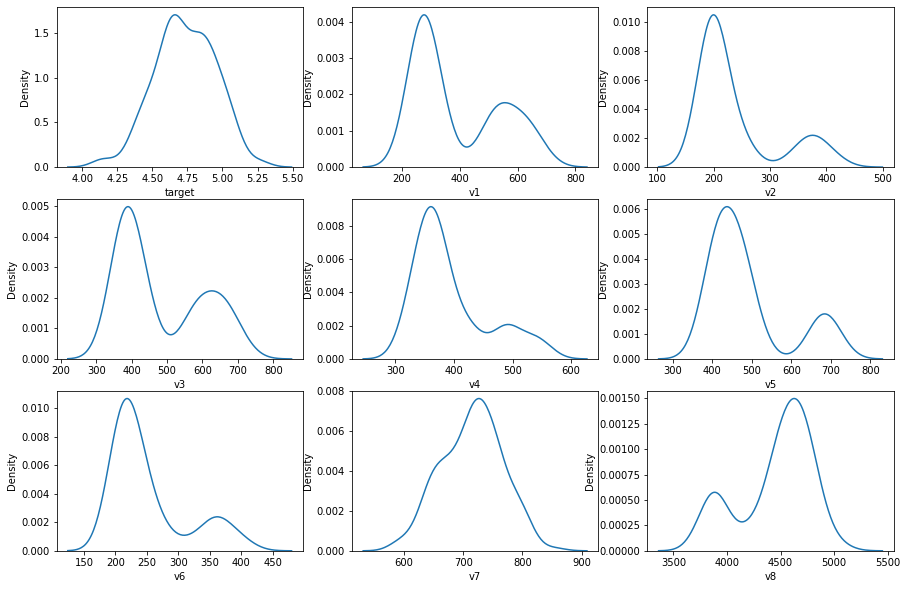

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# numerical column distribution analysis
plt.figure(figsize=(15,10))
for i, col in enumerate(df[numcol].columns):
    if df[numcol][col].dtype != 'object':
        ax = plt.subplot(3, 3, i+1)
        sns.kdeplot(df[numcol][col], ax=ax)
        plt.xlabel(col)
plt.show()

sample_type
lab 1          100
lab 2           60
dtype: int64


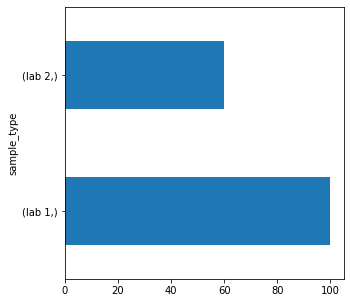

In [ ]:
# categorical column cardinality
df[catcol].value_counts().plot(kind='barh', figsize=(5,5))
print(df[catcol].value_counts())

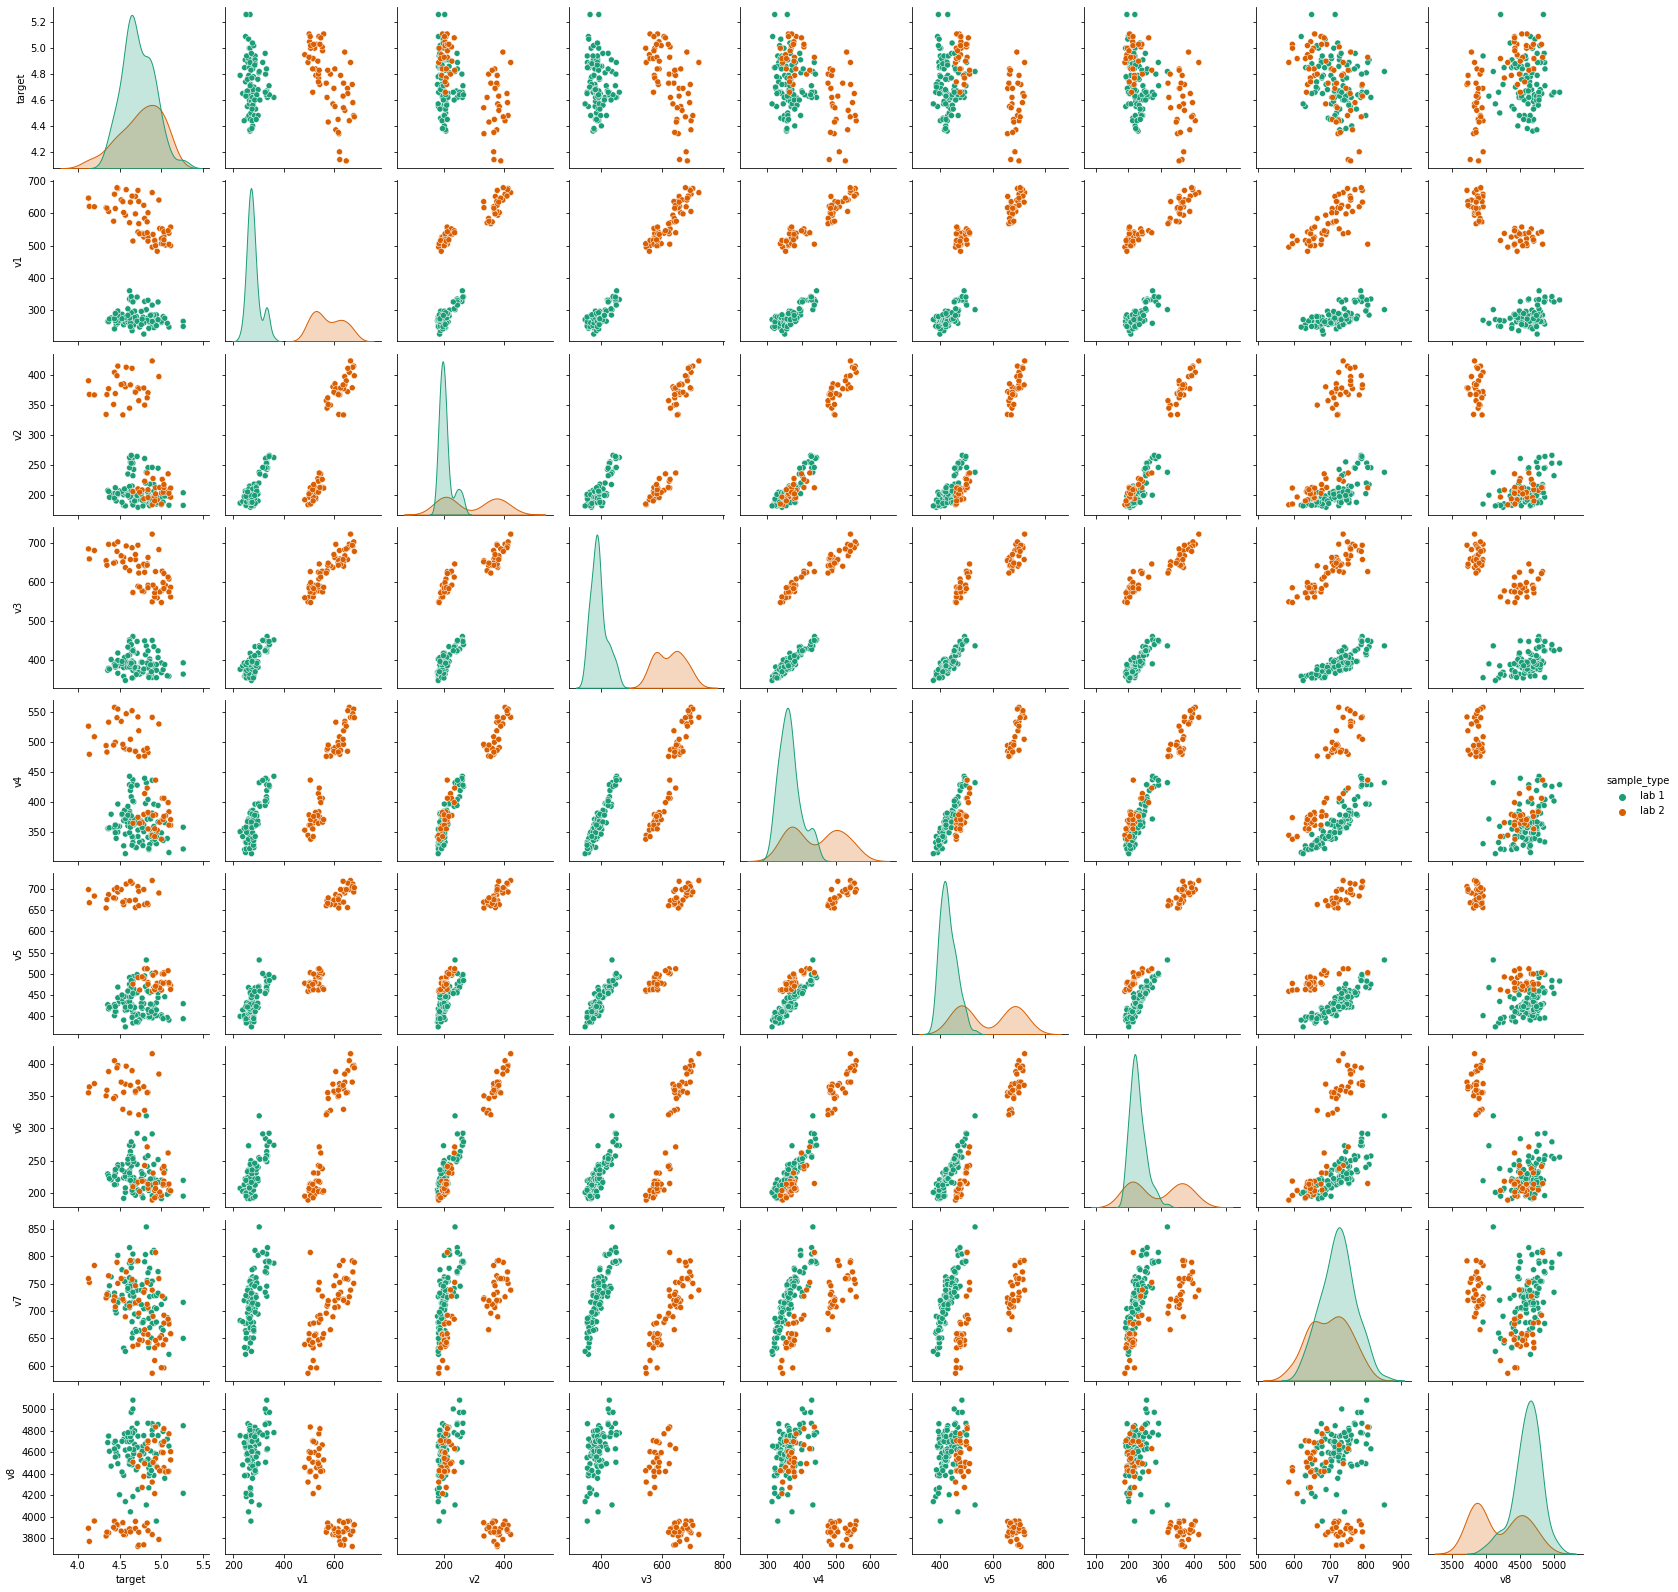

In [ ]:
sns.pairplot(data=df, hue='sample_type', palette= 'Dark2', diag_kind='kde')

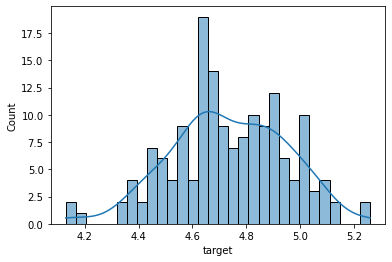

In [69]:
sns.histplot(df['target'], bins=30, kde=True)

____________
# **III.Data Cleaning**

In [ ]:
# Skewness in numerical columns

print('Skewness :')
for i in df[numcol]:
    print(i, ':', df[numcol][i].skew().round(2))

Skewness :
target : -0.16
v1 : 0.64
v2 : 1.46
v3 : 0.6
v4 : 1.14
v5 : 1.27
v6 : 1.3
v7 : -0.11
v8 : -0.77


The skewness value in each column will determine the method to handle outlier. The skewness value above 0.5 and below -0.5 is abnormal distribution and will be handled with Tukey's Rule. Whereas the normal distribution will be handled with Z-score.

In [ ]:
numlist = ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
catlist = ['sample_type']
        

### Check outlier

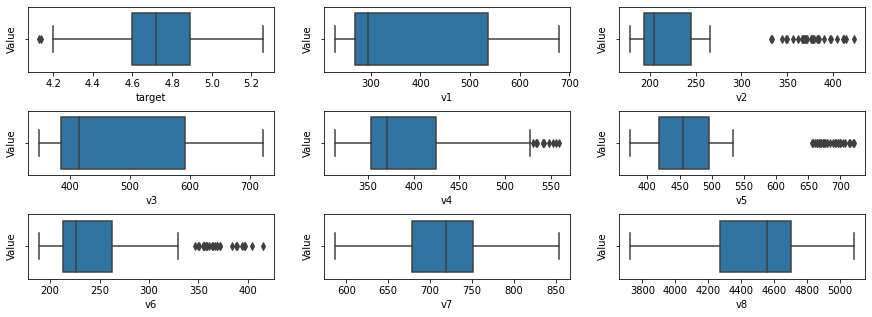

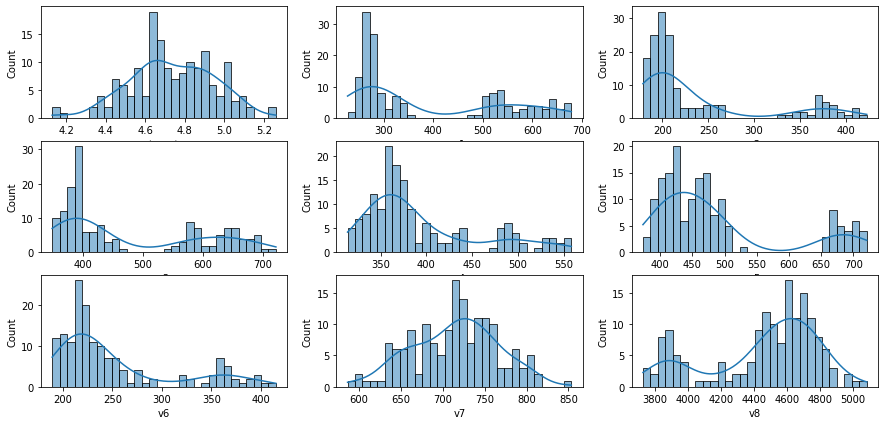

In [ ]:
# Boxplot outlier
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

# check data distribution
plt.figure(figsize=(15,7))
for i, col in enumerate(df[numlist].columns):
    if df[numlist][col].dtype != 'object':
        ax = plt.subplot(3, 3, i+1)
        sns.histplot(df[numlist][col], bins=30, kde=True, ax=ax)
        plt.xlabel(col)
plt.show()
     

Cleaning outliers is the process of identifying and removing extreme or unusual values in a dataset that are not representative of the majority of the data. Outliers can occur due to measurement errors, data entry errors, or simply because they are truly exceptional cases. Removing outliers can improve the accuracy and reliability of statistical analysis and modeling by reducing the influence of these exceptional cases.

### Clean Outlier

In [ ]:
# outlier cleaning

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# outliers into index array
outl_index = df[numlist][((df[numlist] < (Q1 - 1.5 * IQR)) |(df[numlist] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()

# drop outlier from dataset
df2 = df.drop(index=outl_index, axis=1)

# percentage outlier
for col in df2[numlist].columns:
    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df2[numlist][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df2[numlist].iloc[outliers_index]
    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df2[numlist][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))



 target : 0.00%
 v1 : 0.00%
 v2 : 0.00%
 v3 : 0.00%
 v4 : 0.00%
 v5 : 0.00%
 v6 : 0.77%
 v7 : 0.00%
 v8 : 0.77%


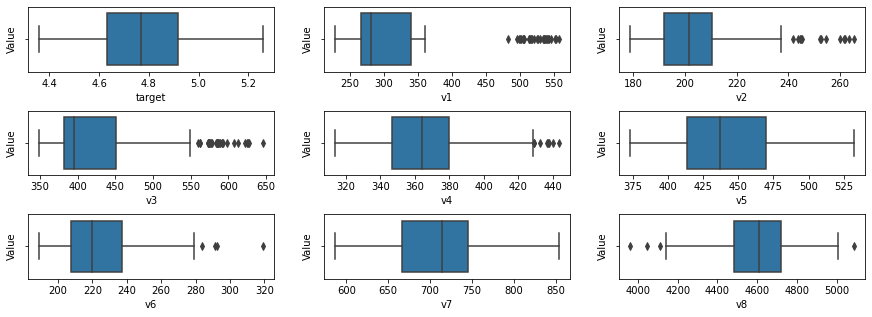

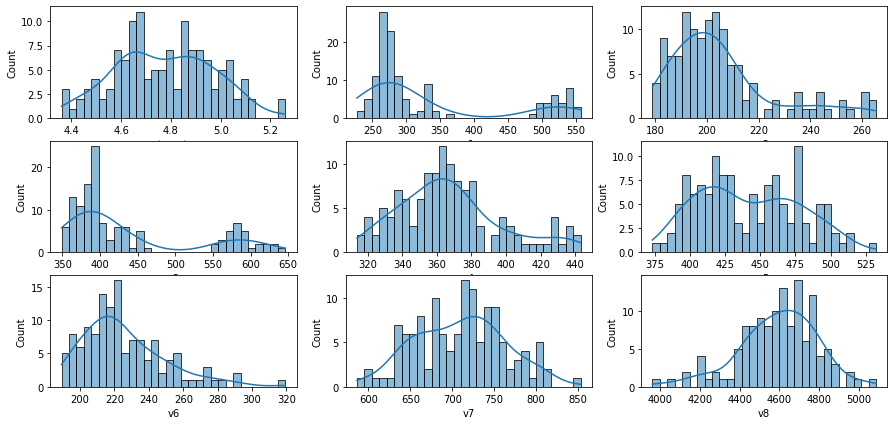

In [ ]:
# Boxplot outlier
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df2[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

print('\n')
# check data distribution
plt.figure(figsize=(15,7))
for i, col in enumerate(df2[numlist].columns):
    if df2[numlist][col].dtype != 'object':
        ax = plt.subplot(3, 3, i+1)
        sns.histplot(df2[numlist][col], bins=30, kde=True, ax=ax)
        plt.xlabel(col)
plt.show()

```Statement :```  
Cleaning outliers twice can have both positive and negative effects on the data. If done correctly, cleaning outliers twice can improve the accuracy and reliability of statistical analysis by removing extreme values that are not representative of the majority of the data. However, if done poorly, cleaning outliers twice can lead to over-cleaning or under-cleaning, resulting in the loss of important information or incorrect conclusions. Therefore, it is important to be careful and thoughtful when cleaning outliers to ensure that the final data accurately represents the underlying information.

In [ ]:

!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 13.8 MB/s eta 0:00:00


# **IV. Clustering Algorithm**

K-means clustering is a powerful technique that can be used to identify patterns and relationships in a numerical dataset. When combined with linear regression, it can be used to predict a target variable based on the values of the numerical columns.

To use k-means clustering in combination with linear regression, we start by dividing the numerical dataset into clusters using the k-means algorithm. Each cluster represents a group of data points that are similar to each other based on their features or attributes. We can then calculate summary statistics, such as the mean or median, for each cluster, and use these statistics to create a new feature in the dataset.

The new feature represents the centroid of each cluster and can be used as a predictor variable in a linear regression model to predict the target variable. By doing this, we can capture the relationships between the numerical columns and the target variable that may not be immediately apparent from looking at the data.

To build the linear regression model, we start by selecting the numerical columns and the new feature as the predictor variables and the target variable as the response variable. we then split the dataset into a training set and a test set, fit the model on the training set, and evaluate its performance on the test set using metrics such as the mean squared error or R-squared.

By using k-means clustering in combination with linear regression, we can gain insights into the behavior of wer target variable and make more accurate predictions based on these insights. However, it is important to note that the quality of the predictions depends on the quality of the clustering, and we may need to experiment with different values of k and initialization methods to get the best results.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# initiate feature engineering
std_scaler = StandardScaler()
ord_encoder = OrdinalEncoder()

In [ ]:
# initiate feature engineering
scaler = StandardScaler()
encoder = OrdinalEncoder()

# scaling numerical feature
df2_stdscl = scaler.fit_transform(df2[numlist])

# encoding categorical feature
df2_ordenc = encoder.fit_transform(df2[catlist])

# assign to new dataframe
df3 = pd.DataFrame(np.concatenate([df2_stdscl, df2_ordenc], axis=1), columns=df2[numlist].columns.tolist()+df2[catlist].columns.tolist()).round(2)

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


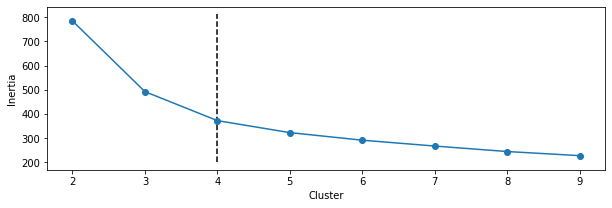

In [ ]:
# Elbow technique to find optimal cluster

from sklearn.cluster import KMeans
from kneed import KneeLocator

c = range(2,10)
inertia = [KMeans(n_clusters=i, random_state=np.random.randint(1,1000), n_init=i).fit(df3).inertia_ for i in c]
kneedle = KneeLocator(c, inertia, S=1, curve="convex", direction='decreasing') # --> elbow point

# display in plot
plt.figure(figsize=(10,3))
plt.plot(c,inertia,'o-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed') # --> elbow point
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

According to kneedle matrix, the optimal cluster is 4 but we need to find how good is the score of cluster whether it is less represents features of whole dataset or is it too much. We may find the score by silhouette score to find the optimal cluster.

{2: 0.7776, 3: 0.8723, 4: 0.9443, 5: 0.9757, 6: 0.9882, 7: 0.9938, 8: 0.9985, 9: 0.9999}


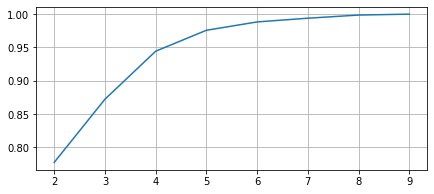

In [ ]:
# Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
from sklearn import metrics

# PCA
var_ratio={}
c = range(2,10)
for n in c:
    pc = PCA(n_components=n)
    cr_pca = pc.fit(df3)
    var_ratio[n] = sum(cr_pca.explained_variance_ratio_).round(4)

pd.Series(var_ratio).plot(figsize=(7,3), grid=True)
print(var_ratio)

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a data set. It does this by identifying the directions (components) in the data that explain the most variance, and then projecting the data onto a lower-dimensional subspace along those directions. This can be useful for data visualization, data compression, and feature selection.  

As the graph depicted, higher the score, it closer to percentage dataset representation. We can choose 9 because it has the highest number with 99% dataset dimension, but our goal is to reduce the dimension to ease indentifying patterns in the data and transforming it into a new coordinate system.

We can choose 3 clusters since it still represents 94% of whole dimension of dataset.

In [ ]:
# set cluster

n_cluster = 4

pc_final = PCA(n_components = n_cluster).fit(df3)
reduced_cr = pc_final.fit_transform(df3)

# assgin cluster into algorithm

km = KMeans(n_clusters = n_cluster, 
              random_state=np.random.randint(1,100), 
              init='random', n_init=2,
              algorithm='full', 
              max_iter=2)

labels = km.fit_predict(df3)

cluster = km.labels_ 

In [ ]:
cluster

array([0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3],
      dtype=int32)

In [ ]:
df4 = pd.DataFrame(np.concatenate([pd.DataFrame(cluster), df2], axis=1), columns=['cluster']+df2.columns.tolist())

In [ ]:
df4.head()

,cluster,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,0,4.63,260.6,199.0,391.33,371.73,466.8,273.13,742.07,4047.73,lab 1
1,2,5.0,263.2,194.6,393.67,348.53,401.8,220.07,712.0,4673.47,lab 1
2,2,4.91,247.27,205.8,375.47,354.87,419.0,222.13,677.2,4386.8,lab 1
3,2,4.77,257.94,191.83,368.72,334.67,417.22,195.94,678.56,4588.78,lab 1
4,2,4.89,258.2,195.73,356.67,333.33,394.6,196.0,677.13,4867.07,lab 1


,target
cluster,
0,4.62
1,4.94
2,4.86
3,4.74


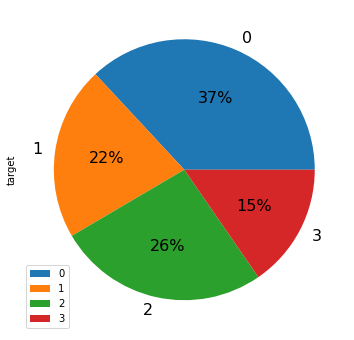

In [ ]:
df4[['cluster', 'target']].groupby(by='cluster').count().plot(kind='pie', 
                                                                   autopct='%.0f%%',
                                                                   figsize=(6,6),
                                                                   subplots=True,
                                                                   fontsize=16)
df4[['cluster', 'target']].groupby(by='cluster').mean().round(2)


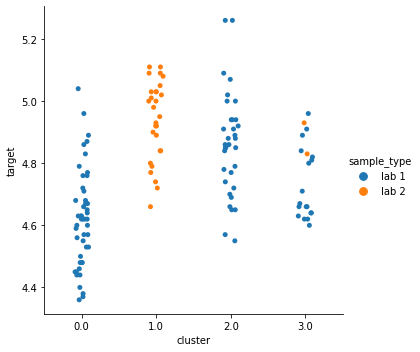

In [67]:
sns.catplot(x='cluster', y='target', hue='sample_type', data=df4)

__________
# **V. Feature Selection**

In [ ]:
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

# correlation value with PhiK according to target
phik_value = df4.phik_matrix().target
phik_value.sort_values(ascending=False).round(2)

target         1.00
v8             1.00
v7             0.99
v4             0.98
v1             0.97
v5             0.97
v3             0.96
v6             0.88
cluster        0.68
sample_type    0.67
v2             0.00
Name: target, dtype: float64

The correlation number of cluster in the dataset to the target may not be straightforwared. In general, the relationship between the number of clusters to the target is not necessarily linear, and may depend on the specific features being used to predict target, as well as the distribution of data within each cluster.  

At the first try, I tried choose 4 cluster as the graph result on elbow technique. The second try I choose 5 clusters and it showed a better result on Phik metric that the more cluster will have better result cluster correlation to the target.  

The cluster graph itself showed a unique pattern of the target. The cluster creates group for themselve based on the range of target as if they have characteristic and behavior.  

Since the Phik metric says it has 68% correlation to the target, the model will get strong influence to predict the target value based on their characteristic of the cluster. It may help the model to improve their prediction.

We will drop column v2 since it has no correlation to the target. Dropping column that has no correlation to target will avoid the model overfit when training the data.

____________
# **VI. Model Building**

### Feature Engineering

In [ ]:

df4.dtypes

cluster        object
target         object
v1             object
v2             object
v3             object
v4             object
v5             object
v6             object
v7             object
v8             object
sample_type    object
dtype: object

In [ ]:
df4[['cluster', 'target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']] = df4[['cluster', 'target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']].astype(float)

In [70]:
df4.dtypes

cluster        float64
target         float64
v1             float64
v2             float64
v3             float64
v4             float64
v5             float64
v6             float64
v7             float64
v8             float64
sample_type     object
dtype: object

In [ ]:
x = df4.drop(['target', 'v2', 'cluster'], axis=1)
y = df4['target']

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


In [ ]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print('train size :', x_train.shape)
print('test size :', x_test.shape)

train size : (104, 8)
test size : (26, 8)


In [ ]:
x.columns.tolist()

['v1', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'sample_type']

In [ ]:
x_numlist = ['v1', 'v3', 'v4', 'v5', 'v7', 'v8']
x_catlist = ['sample_type']

### Create pipeline for feature encoding and scaling

In [ ]:
from sklearn.pipeline import Pipeline

# Define the pipeline
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, x_numlist),
        ('cat', categorical_transformer, x_catlist)
    ])

### Preview model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import RadiusNeighborsRegressor

lr = LinearRegression()
rf = RandomForestRegressor(max_depth = 15, min_samples_split = 10, n_estimators= 500)
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor(n_estimators = 50, max_depth = 3, learning_rate=0.5)
ri = Ridge()
ab = AdaBoostRegressor(base_estimator = rf)
la = Lasso()

# Define the models to evaluate
models = {lr, rf, dt, knn, gb, ri, ab, la}

# Define the pipeline for each model
pipelines = []
for model in models:
    pipelines.append(Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', model)]))

# Evaluate each model using cross-validation
results = []
for model, pipeline in zip(models, pipelines):
    scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_rmse = rmse_scores.mean()
    results.append((type(model).__name__, mean_rmse))

# Find the best model based on the mean RMSE score
best_model = min(results, key=lambda x: x[1])

# Print the results
for result in results:
    print(f"{result[0]}: Mean RMSE = {result[1]:.2f}")

print(f"\nBest Model: {best_model[0]} with Mean RMSE = {best_model[1]:.2f}")


Lasso: Mean RMSE = 0.19
KNeighborsRegressor: Mean RMSE = 0.16
AdaBoostRegressor: Mean RMSE = 0.18
LinearRegression: Mean RMSE = 0.18
RandomForestRegressor: Mean RMSE = 0.18
Ridge: Mean RMSE = 0.17
DecisionTreeRegressor: Mean RMSE = 0.26
GradientBoostingRegressor: Mean RMSE = 0.21

Best Model: KNeighborsRegressor with Mean RMSE = 0.16


RMSE stands for 'Root Mean Squared Error', is a measure of the difference between set of predicted values and actual values. In the context of the model, RMSE is used to evaluate how well the model is able to make prediction.  

An RMSE of 0.18 indicates that the average difference between the predicted values and the actual values is 0.18 units. In other words, the model's predictions are, on average, off by 0.18 units. The closer the RMSE to zero, the better the model is at making predictions.

We will evaluate every model to see which one has the best performance with hyperparameter tuning.

### Linear Regression Model

train result :
Mean Squared Error:  0.16
R-squared train:  0.26
Mean Absolute Error train-Set  :  0.13


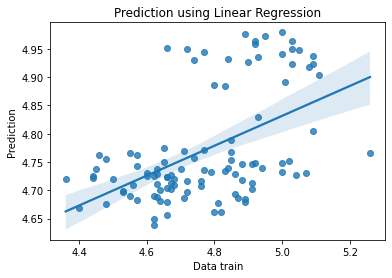



test result :
Mean Squared Error:  0.2
R-squared Test:  0.19
Mean Absolute Error Test-Set  :  0.17


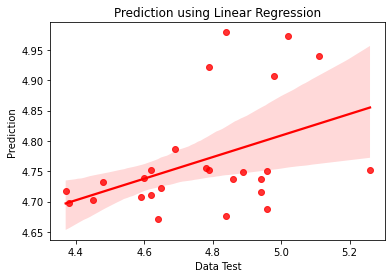

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline
pipe_linereg = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Fit the model
pipe_linereg.fit(x_train, y_train)

# predict on train set
y_pred_linreg_train = pipe_linereg.predict(x_train)

# Predict on the test set
y_pred_linreg_test = pipe_linereg.predict(x_test)

# Print evaluation metrics
print('train result :')
print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_train, y_pred_linreg_train)).round(2))
print("R-squared train: ", r2_score(y_train, y_pred_linreg_train).round(2))
print('Mean Absolute Error train-Set  : ', mean_absolute_error(y_train, y_pred_linreg_train).round(2))

# display prediction graph
sns.regplot(x=y_train, y=y_pred_linreg_train)
plt.xlabel('Data train')
plt.ylabel('Prediction')
plt.title('Prediction using Linear Regression')
plt.show()
print('\n')

# Print evaluation metrics
print('test result :')
print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred_linreg_test)).round(2))
print("R-squared Test: ", r2_score(y_test, y_pred_linreg_test).round(2))
print('Mean Absolute Error Test-Set  : ', mean_absolute_error(y_test, y_pred_linreg_test).round(2))

# display prediction graph
sns.regplot(x=y_test, y=y_pred_linreg_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Prediction using Linear Regression')
plt.show()


### Decision Tree Regressor

train result :
MSE: 0.00
MAE: 0.00
R-squared: 1.00


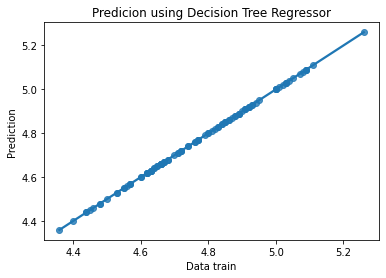



test result :
MSE: 0.05
MAE: 0.19
R-squared: -0.08


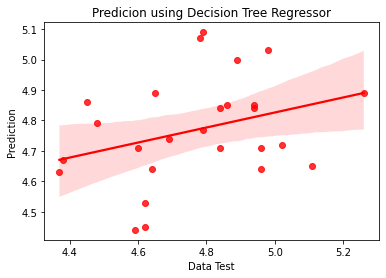

In [ ]:
from sklearn.tree import DecisionTreeRegressor

pipe_dt = Pipeline(steps=[('preprocessor', preprocessor),
                       ('dt_reg', DecisionTreeRegressor())])

# Fit the GridSearchCV object to the data
pipe_dt.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dt_train = pipe_dt.predict(x_train)

# Make predictions on the test set
y_pred_dt_test = pipe_dt.predict(x_test)

# Evaluate the model's performance using MSE, MAE and R-squared
mse_dt_train = mean_squared_error(y_train, y_pred_dt_train)
mae_dt_train = mean_absolute_error(y_train, y_pred_dt_train)
r2_dt_train = r2_score(y_train, y_pred_dt_train)

# Print the results
print('train result :')
print(f'MSE: {mse_dt_train:.2f}\nMAE: {mae_dt_train:.2f}\nR-squared: {r2_dt_train:.2f}')

# display prediction graph
sns.regplot(x=y_train, y=y_pred_dt_train)
plt.xlabel('Data train')
plt.ylabel('Prediction')
plt.title('Predicion using Decision Tree Regressor')
plt.show()
print('\n')

# Evaluate the model's performance using MSE, MAE and R-squared
mse_dt_test = mean_squared_error(y_test, y_pred_dt_test)
mae_dt_test = mean_absolute_error(y_test, y_pred_dt_test)
r2_dt_test = r2_score(y_test, y_pred_dt_test)

# Print the results
print('test result :')
print(f'MSE: {mse_dt_test:.2f}\nMAE: {mae_dt_test:.2f}\nR-squared: {r2_dt_test:.2f}')

# display prediction graph
sns.regplot(x=y_test, y=y_pred_dt_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using Decision Tree Regressor')
plt.show()

### Random Forest Regressor

Fitting 7 folds for each of 27 candidates, totalling 189 fits
train result :
MSE: 0.01
MAE: 0.09
R-squared: 0.65


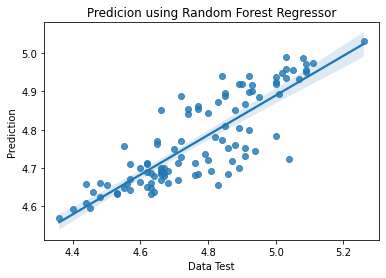



test result :
MSE: 0.04
MAE: 0.15
R-squared: 0.15


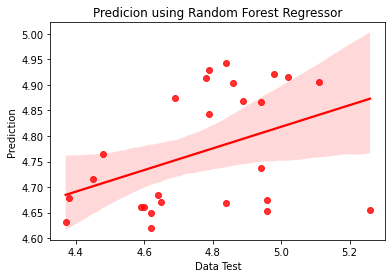

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                       ('rf', RandomForestRegressor())])

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(pipe_rf, param_grid_rf, cv=7, n_jobs=-1, verbose = 1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_model_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_

# Make predictions on the train set
y_pred_rf_train = best_model_rf.predict(x_train)

# Make predictions on the test set
y_pred_rf_test = best_model_rf.predict(x_test)

# Evaluate the model's performance using MSE, MAE and R-squared
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
mae_rf_train = mean_absolute_error(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)

# Print the results
print('train result :')
print(f'MSE: {mse_rf_train:.2f}\nMAE: {mae_rf_train:.2f}\nR-squared: {r2_rf_train:.2f}')

# display prediction graph
sns.regplot(x=y_train, y=y_pred_rf_train)
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using Random Forest Regressor')
plt.show()
print('\n')

# Evaluate the model's performance using MSE, MAE and R-squared
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
mae_rf_test = mean_absolute_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

# Print the results
print('test result :')
print(f'MSE: {mse_rf_test:.2f}\nMAE: {mae_rf_test:.2f}\nR-squared: {r2_rf_test:.2f}')

# display prediction graph
sns.regplot(x=y_test, y=y_pred_rf_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using Random Forest Regressor')
plt.show()

### Ridge Regressor

Fitting 7 folds for each of 27 candidates, totalling 189 fits
Train result :
MSE: 0.01
MAE: 0.09
R-squared: 0.65


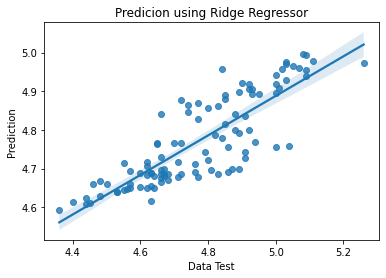



test result :
MSE: 0.04
MAE: 0.15
R-squared: 0.14


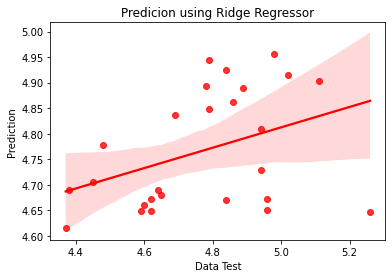

In [ ]:
# Define the pipeline
pipe_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                           ('ridge', Ridge(alpha=0.5))])

# Define the hyperparameters to tune
param_grid_rid = {'ridge__alpha': [0.1, 1, 10, 100]}

# Fit the GridSearchCV object to the data
pipe_ridge.fit(x_train, y_train)

# Create the GridSearchCV object with 5-fold cross-validation
grid_search_ridge = GridSearchCV(pipe_rf, param_grid_rid, cv=10, n_jobs=-1, verbose = 1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_model_ridge = grid_search.best_estimator_
best_params_ridge = grid_search.best_params_

# Make predictions on the train set
y_pred_ridge_train = best_model_ridge.predict(x_train)

# Make predictions on the test set
y_pred_ridge_test = best_model_ridge.predict(x_test)

# Evaluate the model's performance using MSE, MAE and R-squared
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Print the results
print('Train result :')
print(f'MSE: {mse_ridge_train:.2f}\nMAE: {mae_ridge_train:.2f}\nR-squared: {r2_ridge_train:.2f}')

# display prediction graph
sns.regplot(x=y_train, y=y_pred_ridge_train)
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using Ridge Regressor')
plt.show()
print('\n')

# Evaluate the model's performance using MSE, MAE and R-squared
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Print the results
print('test result :')
print(f'MSE: {mse_ridge_test:.2f}\nMAE: {mae_ridge_test:.2f}\nR-squared: {r2_ridge_test:.2f}')

# display prediction graph
sns.regplot(x=y_test, y=y_pred_ridge_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using Ridge Regressor')
plt.show()

### KNeighbors Regressor

Fitting 10 folds for each of 8 candidates, totalling 80 fits
MSE: 0.02
MAE: 0.12
R2 Score: 0.36


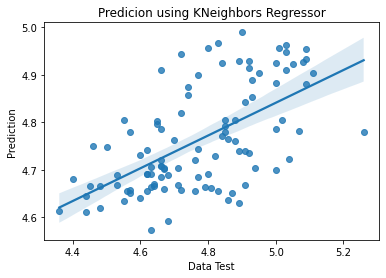



MSE: 0.04
MAE: 0.16
R2 Score: 0.11


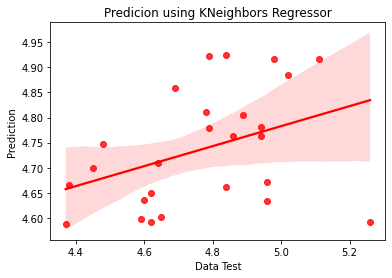

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the pipeline with a StandardScaler and a KNN regressor
pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Define the hyperparameters to search over
params_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

# Define the GridSearchCV object with 5-fold cross-validation
grid_knn = GridSearchCV(pipe_knn, params_knn, cv=10, n_jobs=-1, verbose = 1)

# Fit the GridSearchCV object to the training data
grid_knn.fit(x_train, y_train)

# Get the best KNN regressor
best_knn = grid_knn.best_estimator_

# Make predictions on the training data
y_pred_knn_train = best_knn.predict(x_train)

# Make predictions on the testing data
y_pred_knn_test = best_knn.predict(x_test)

# Compute the evaluation metrics
mse_knn_train = mean_squared_error(y_train, y_pred_knn_train)
mae_knn_train = mean_absolute_error(y_train, y_pred_knn_train)
r2_knn_train = r2_score(y_train, y_pred_knn_train)

# Print the results
print(f'MSE: {mse_knn_train:.2f}')
print(f'MAE: {mae_knn_train:.2f}')
print(f'R2 Score: {r2_knn_train:.2f}')

# display prediction graph
sns.regplot(x=y_train, y=y_pred_knn_train)
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using KNeighbors Regressor')
plt.show()
print('\n')

# Compute the evaluation metrics
mse_knn_test = mean_squared_error(y_test, y_pred_knn_test)
mae_knn_test = mean_absolute_error(y_test, y_pred_knn_test)
r2_knn_test = r2_score(y_test, y_pred_knn_test)

# Print the results
print(f'MSE: {mse_knn_test:.2f}')
print(f'MAE: {mae_knn_test:.2f}')
print(f'R2 Score: {r2_knn_test:.2f}')

# display prediction graph
sns.regplot(x=y_test, y=y_pred_knn_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using KNeighbors Regressor')
plt.show()

### Gradient Boosting Regression

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Train result :
Mean Squared Error:  0.1
R-squared Test:  0.7
Mean Absolute Error  :  0.08


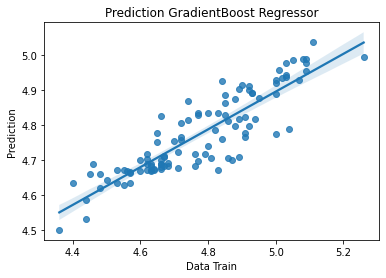



test result :
Mean Squared Error:  0.21
R-squared Test:  0.09
Mean Absolute Error :  0.16


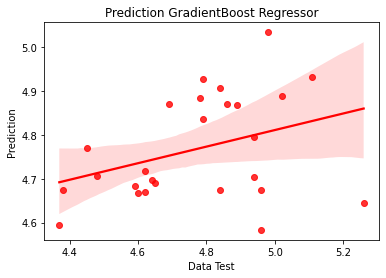

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters to search
param_grad = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

pipe_grad = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', GradientBoostingRegressor())])

# Create the GridSearchCV object
grid_search_grad = GridSearchCV(pipe_grad, param_grid=param_grad, cv=10, n_jobs=-1, verbose = 1)

# Fit the model
grid_search_grad.fit(x_train, y_train)

# Get the best model and its parameters
best_model_grad = grid_search_grad.best_estimator_
best_params_grad = grid_search_grad.best_params_

# train set
y_pred_grad_train = best_model_grad.predict(x_train)

# test set
y_pred_grad_test = best_model_grad.predict(x_test)

# Print evaluation metrics
print('Train result :')
print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_train, y_pred_grad_train)).round(2))
print("R-squared Test: ", r2_score(y_train, y_pred_grad_train).round(2))
print('Mean Absolute Error  : ', mean_absolute_error(y_train, y_pred_grad_train).round(2))

# display prediction graph
sns.regplot(x=y_train, y=y_pred_grad_train)
plt.xlabel('Data Train')
plt.ylabel('Prediction')
plt.title('Prediction GradientBoost Regressor')
plt.show()
print('\n')

# Print evaluation metrics
print('test result :')
print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred_grad_test)).round(2))
print("R-squared Test: ", r2_score(y_test, y_pred_grad_test).round(2))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred_grad_test).round(2))

# display prediction graph
sns.regplot(x=y_test, y=y_pred_grad_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Prediction GradientBoost Regressor')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

### Ada Boost Regressor

Training result :
MSE: 0.01
MAE: 0.09
R-squared: 0.72


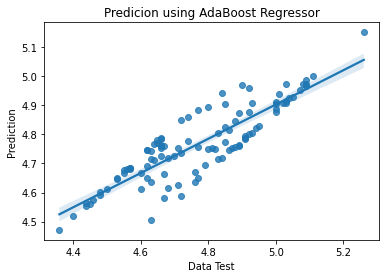



testing result :
MSE: 0.03
MAE: 0.14
R-squared: 0.29


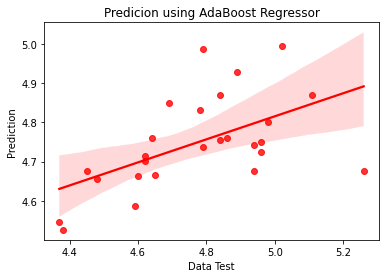

In [ ]:
rf = RandomForestRegressor(max_depth = 15, min_samples_split = 10, n_estimators= 200)

pipe_ada = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 2)),
                          ('ada', AdaBoostRegressor(base_estimator = rf, 
                                                       n_estimators = 500, 
                                                       loss='exponential', 
                                                       learning_rate=0.5))])

# Fit the GridSearchCV object to the data
pipe_ada.fit(x_train, y_train)

# Make predictions on the test set
y_pred_ada_train = pipe_ada.predict(x_train)
y_pred_ada_test = pipe_ada.predict(x_test)

# Evaluate the model's performance using MSE, MAE and R-squared
mse_ada_train = mean_squared_error(y_train, y_pred_ada_train)
mse_ada_test = mean_squared_error(y_test, y_pred_ada_test)

mae_ada_train = mean_absolute_error(y_train, y_pred_ada_train)
mae_ada_test = mean_absolute_error(y_test, y_pred_ada_test)

r2_ada_train = r2_score(y_train, y_pred_ada_train)
r2_ada_test = r2_score(y_test, y_pred_ada_test)

# train result
print('Training result :')
print(f'MSE: {mse_ada_train:.2f}\nMAE: {mae_ada_train:.2f}\nR-squared: {r2_ada_train:.2f}')

# display prediction graph
sns.regplot(x=y_train, y=y_pred_ada_train)
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using AdaBoost Regressor')
plt.show()
print('\n')

# Test result
print('testing result :')
print(f'MSE: {mse_ada_test:.2f}\nMAE: {mae_ada_test:.2f}\nR-squared: {r2_ada_test:.2f}')

# display prediction graph
sns.regplot(x=y_test, y=y_pred_ada_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using AdaBoost Regressor')
plt.show()

### Ensemble Method

MSE: 0.01
MAE: 0.08
R-squared: 0.72


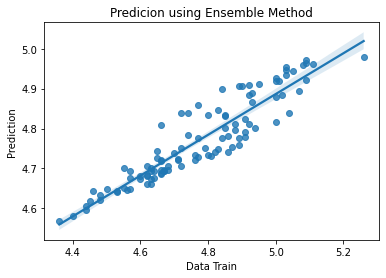



MSE: 0.04
MAE: 0.15
R-squared: 0.20


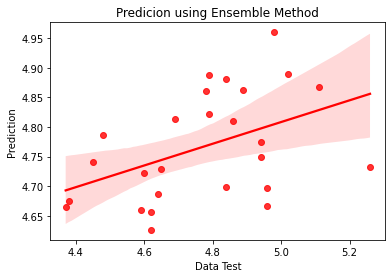

In [ ]:
# Instantiate the models
lr = LinearRegression()
rf = RandomForestRegressor(max_depth = 15, min_samples_split = 10, n_estimators= 500)
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor(n_estimators = 50, max_depth = 3, learning_rate=0.5)
ri = Ridge()
ab = AdaBoostRegressor(base_estimator = rf)
la = Lasso()
rnr = RadiusNeighborsRegressor()

# Define the ensemble
ensemble = VotingRegressor(estimators=[('lr', lr), 
                                       ('rf', rf), 
                                       ('dt', dt), 
                                       ('knn', knn), 
                                       ('gb', gb),
                                       ('ri', ri),
                                       ('la', la),
                                       ('ab', ab)])

pipe_ens = Pipeline(steps=[('preprocessor', preprocessor),
                       ('ens', ensemble)])

# Fit the ensemble to the training data
pipe_ens.fit(x_train, y_train)

# Predict on the traom data
y_pred_ens_train = pipe_ens.predict(x_train)

# Predict on the test data
y_pred_ens_test = pipe_ens.predict(x_test)

# Evaluate the model's performance using MSE, MAE and R-squared
mse_ens_train = mean_squared_error(y_train, y_pred_ens_train)
mae_ens_train = mean_absolute_error(y_train, y_pred_ens_train)
r2_ens_train = r2_score(y_train, y_pred_ens_train)

# Print the results
print(f'MSE: {mse_ens_train:.2f}\nMAE: {mae_ens_train:.2f}\nR-squared: {r2_ens_train:.2f}')

# display prediction graph
sns.regplot(x=y_train, y=y_pred_ens_train)
plt.xlabel('Data Train')
plt.ylabel('Prediction')
plt.title('Predicion using Ensemble Method')
plt.show()
print('\n')

# Evaluate the model's performance using MSE, MAE and R-squared
mse_ens_test = mean_squared_error(y_test, y_pred_ens_test)
mae_ens_test = mean_absolute_error(y_test, y_pred_ens_test)
r2_ens_test = r2_score(y_test, y_pred_ens_test)

# Print the results
print(f'MSE: {mse_ens_test:.2f}\nMAE: {mae_ens_test:.2f}\nR-squared: {r2_ens_test:.2f}')

# display prediction graph
sns.regplot(x=y_test, y=y_pred_ens_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using Ensemble Method')
plt.show()

### Polynomial Random Forest Regressor

MSE: 0.00
MAE: 0.05
R-squared: 0.87


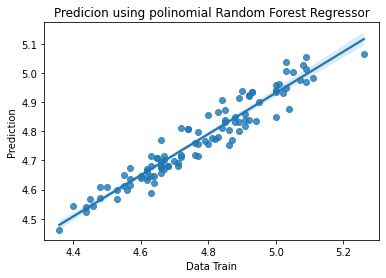



MSE: 0.05
MAE: 0.16
R-squared: 0.07


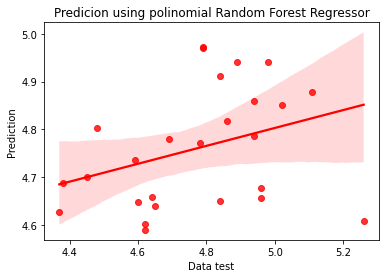

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Define the pipeline
pipe_pol = Pipeline(steps=[('preprocessor', preprocessor),
                           ('poly', PolynomialFeatures()),
                           ('rf', RandomForestRegressor())
])

# Define the hyperparameters to search over
params_pol = {
    'poly__degree': [1, 2, 3, 4],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [2, 5, 10]
}

# Perform grid search using cross-validation
grid_search_pol = GridSearchCV(pipe_pol, params_pol, cv=5, n_jobs=-1)
grid_search_pol.fit(x_train, y_train)

# Predict on the test set and evaluate the performance
y_pred_pol_train = grid_search_pol.predict(x_train)

# Predict on the test set and evaluate the performance
y_pred_pol_test = grid_search_pol.predict(x_test)

# Evaluate the model's performance using MSE, MAE and R-squared
mse_pol_train = mean_squared_error(y_train, y_pred_pol_train)
mae_pol_train = mean_absolute_error(y_train, y_pred_pol_train)
r2_pol_train = r2_score(y_train, y_pred_pol_train)

# Print the results
print(f'MSE: {mse_pol_train:.2f}\nMAE: {mae_pol_train:.2f}\nR-squared: {r2_pol_train:.2f}')

# display prediction graph
sns.regplot(x=y_train, y=y_pred_pol_train)
plt.xlabel('Data Train')
plt.ylabel('Prediction')
plt.title('Predicion using polinomial Random Forest Regressor')
plt.show()
print('\n')

# Evaluate the model's performance using MSE, MAE and R-squared
mse_pol_test = mean_squared_error(y_test, y_pred_pol_test)
mae_pol_test = mean_absolute_error(y_test, y_pred_pol_test)
r2_pol_test = r2_score(y_test, y_pred_pol_test)

# Print the results
print(f'MSE: {mse_pol_test:.2f}\nMAE: {mae_pol_test:.2f}\nR-squared: {r2_pol_test:.2f}')

# display prediction graph
sns.regplot(x=y_test, y=y_pred_pol_test, color='red')
plt.xlabel('Data test')
plt.ylabel('Prediction')
plt.title('Predicion using polinomial Random Forest Regressor')
plt.show()

# **VII. Model Performance Result**

In [ ]:
models = [('linereg', pipe_linereg),
          ('dt', pipe_dt),
          ('rf', pipe_rf),
          ('rid', pipe_ridge),
          ('knn', pipe_knn),
          ('grad', pipe_grad),
          ('ada', pipe_ada),
          ('ens', pipe_ens),
          ('pol', pipe_pol)]

# Evaluate each model and store the results
results = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred_eva = model.predict(x_test)
    mse_eva = mean_squared_error(y_test, y_pred_eva)
    mae_eva = mean_absolute_error(y_test, y_pred_eva)
    r2_eva = r2_score(y_test, y_pred_eva)
    results.append((name, mse_eva, mae_eva, r2_eva))


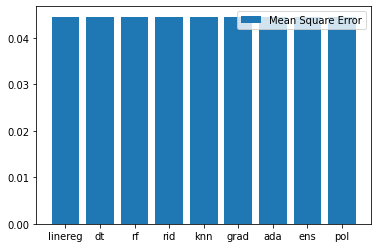

In [ ]:
# Plot the results as a bar chart
names = [r[0] for r in results]
fig, ax = plt.subplots()
ax.bar(names, mse_eva, label='Mean Square Error')
ax.legend()
plt.show()

MSE, or Mean Squared Error, measures the average squared difference between the predicted and actual values. It's calculated by taking the average of the squared differences between the predicted and actual values. Since it squares the difference, it tends to penalize larger errors more heavily than smaller errors.  

A lower Mean Square Error indicates that the predicted values are closer to the actual values, and thus, the model is making more accurate predictions. In other word, the smaller value, the smaller chance of error in prediction.

As we see on the graph, KNeighbors Regressor has the smallest MSE amongs the other model which has 0.02 value.

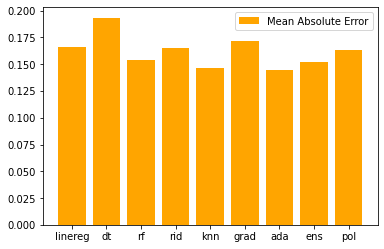

In [ ]:
# Plot the results as a bar chart
names = [r[0] for r in results]
mae_eva = [r[2] for r in results]
fig, ax = plt.subplots()
ax.bar(names, mae_eva, label='Mean Absolute Error', color='orange')
ax.legend()
plt.show()

MAE, or Mean Absolute Error, measures the average absolute difference between the predicted and actual values. It's calculated by taking the average of the absolute differences between the predicted and actual values. Unlike MSE, it does not square the difference and therefore, it treats all errors equally, regardless of their size.  

The lowest MAE is on KNeighbors Regressor amongs the other model, which has value 0.12.

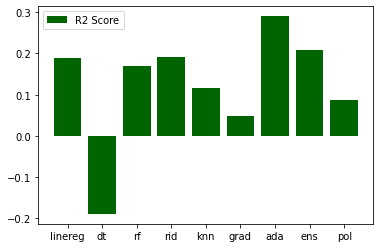

In [ ]:
# Plot the results as a bar chart
names = [r[0] for r in results]
r2_eva = [r[3] for r in results]
fig, ax = plt.subplots()
ax.bar(names, r2_eva, label='R2 Score', color='darkgreen')
ax.legend()
plt.show()

R2 score, also known as the coefficient of determination, is a metric used to evaluate the goodness of fit of a regression model. It measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

The r2 score indicates how well the model fits the data compared to a simple baseline model that always predicts the mean of the dependent variable. An r2 score of 1 indicates that the model perfectly fits the data, while an r2 score of 0 indicates that the model does not fit the data at all.

In this case, the highest R2 score amongs the other model is on AdaBoostRegressor which has value 0.54.

# **VIII. Model Improvement**

## #1 Attempt

Training result :
MSE: 0.02
MAE: 0.12
R-squared: 0.48


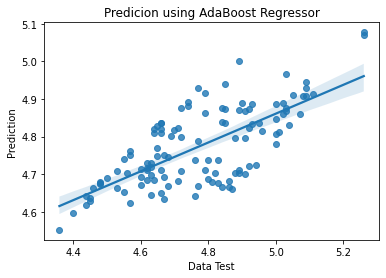



testing result :
MSE: 0.03
MAE: 0.13
R-squared: 0.43


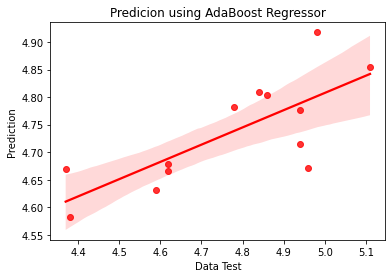

In [ ]:
# Split data into training and test sets
xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, test_size=0.1, random_state=42)

rf1 = RandomForestRegressor(max_depth = 5, min_samples_split = 10, n_estimators= 200, ccp_alpha=0.01)

pipe_ada1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('ada', AdaBoostRegressor(base_estimator = rf1, 
                                                       n_estimators = 200, 
                                                       loss='exponential', 
                                                       learning_rate=0.5))])


# Fit the GridSearchCV object to the data
pipe_ada1.fit(xx_train, yy_train)

# Make predictions on the test set
yy_pred_ada1_train = pipe_ada1.predict(xx_train)
yy_pred_ada1_test = pipe_ada1.predict(xx_test)

# Evaluate the model's performance using MSE, MAE and R-squared
mse_ada_train = mean_squared_error(yy_train, yy_pred_ada1_train)
mse_ada_test = mean_squared_error(yy_test, yy_pred_ada1_test)

mae_ada_train = mean_absolute_error(yy_train, yy_pred_ada1_train)
mae_ada_test = mean_absolute_error(yy_test, yy_pred_ada1_test)

r2_ada_train = r2_score(yy_train, yy_pred_ada1_train)
r2_ada_test = r2_score(yy_test, yy_pred_ada1_test)

# train result
print('Training result :')
print(f'MSE: {mse_ada_train:.2f}\nMAE: {mae_ada_train:.2f}\nR-squared: {r2_ada_train:.2f}')

# displayy prediction graph
sns.regplot(x=yy_train, y=yy_pred_ada1_train)
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using AdaBoost Regressor')
plt.show()
print('\n')

# Test result
print('testing result :')
print(f'MSE: {mse_ada_test:.2f}\nMAE: {mae_ada_test:.2f}\nR-squared: {r2_ada_test:.2f}')

# displayy prediction graph
sns.regplot(x=yy_test, y=yy_pred_ada1_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using AdaBoost Regressor')
plt.show()

## #2 Attempt

Training result :
MSE: 0.02
MAE: 0.12
R-squared: 0.52


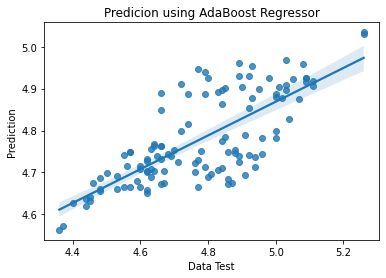



testing result :
MSE: 0.01
MAE: 0.09
R-squared: 0.51


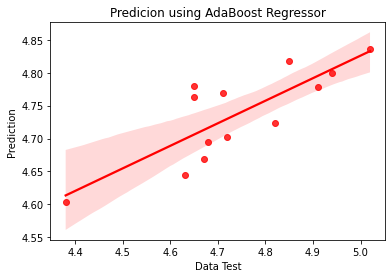

In [ ]:
# Split data into training and test sets
xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, test_size=0.1, random_state = np.random.randint(2,100))

rf2 = RandomForestRegressor(max_depth = 5, min_samples_split = 5 , n_estimators= 50, ccp_alpha=0.01)
ada_x = AdaBoostRegressor(base_estimator = rf2)

pipe_ada2 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('poly', PolynomialFeatures(degree=2)),
                          ('ada', AdaBoostRegressor(base_estimator = ada_x))])

param_ada = {
    'ada__n_estimators' : [100],
    'ada__loss' : ['exponential'],
    'ada__learning_rate' : [0.4]
}

# Fit the GridSearchCV object to the data
grid_search_ada = GridSearchCV(pipe_ada2, param_ada, cv=5)

# Fit the GridSearchCV object to the data
grid_search_ada.fit(xx_train, yy_train)

# Make predictions on the test set
yy_pred_ada2_train = grid_search_ada.predict(xx_train)
yy_pred_ada2_test = grid_search_ada.predict(xx_test)

# Evaluate the model's performance using MSE, MAE and R-squared
mse_ada_train = mean_squared_error(yy_train, yy_pred_ada2_train)
mse_ada_test = mean_squared_error(yy_test, yy_pred_ada2_test)

mae_ada_train = mean_absolute_error(yy_train, yy_pred_ada2_train)
mae_ada_test = mean_absolute_error(yy_test, yy_pred_ada2_test)

r2_ada_train = r2_score(yy_train, yy_pred_ada2_train)
r2_ada_test = r2_score(yy_test, yy_pred_ada2_test)

# train result
print('Training result :')
print(f'MSE: {mse_ada_train:.2f}\nMAE: {mae_ada_train:.2f}\nR-squared: {r2_ada_train:.2f}')

# displayy prediction graph
sns.regplot(x=yy_train, y=yy_pred_ada2_train)
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using AdaBoost Regressor')
plt.show()
print('\n')

# Test result
print('testing result :')
print(f'MSE: {mse_ada_test:.2f}\nMAE: {mae_ada_test:.2f}\nR-squared: {r2_ada_test:.2f}')

# displayy prediction graph
sns.regplot(x=yy_test, y=yy_pred_ada2_test, color='red')
plt.xlabel('Data Test')
plt.ylabel('Prediction')
plt.title('Predicion using AdaBoost Regressor')
plt.show()

```Model Improvement explaination :```  

  1. The first model had an R-squared (R2) training score of 0.48, indicating that 48% of the variance in the dependent variable could be explained by the model's independent variables. The R2 test score was 0.43, which suggests that the model did not perform as well when applied to new, unseen data. This could indicate that the model overfit the training data, meaning it became too specialized to the specific patterns of the training set and could not generalize well to new data.

  2. The second model had a higher R2 training score of 0.51, indicating that it explained more of the variance in the dependent variable than the first model. The R2 test score was also higher at 0.52, suggesting that the second model was better at generalizing to new, unseen data. This could indicate that the second model was better at capturing the underlying patterns in the data, rather than simply memorizing the training set.

  3. Nesting machine learning models is a powerful technique that can be used to improve the accuracy and robustness of predictions. In the second attempt of model improvement, I put a Random Forest Regressor with ccp_alpha of 0.01 inside the best estimator of the first AdaBoostRegressor, and then put the first AdaBoostRegressor inside the best estimator of the second AdaBoostRegressor.

  4. By lowering the test size into 10% is possible that a smaller test size could result in a higher R-squared score, and a larger test size could result in a lower R-squared score.

In the context of AdaboostRegressor, it is a boosting algorithm that combines weak learners, in this case Random Forest Regressor, to form a stronger ensemble model. The AdaboostRegressor trains a sequence of weak learners, and each subsequent model tries to correct the errors of the previous model. By setting the Random Forest Regressor as the base estimator of AdaboostRegressor, we can benefit from the strengths of both algorithms, as the Random Forest Regressor is able to capture complex interactions in the data and AdaboostRegressor can help improve the overall performance and reduce overfitting.

By nesting technique, I combined the strengths of each model to improve the accuracy and robustness of the final prediction. The Random Forest Regressor is known for its ability to handle complex data with high dimensionality, while AdaBoost is a powerful ensemble learning algorithm that can improve the predictive power of weak learners. Nesting these models in this way can help to improve the overall accuracy and robustness of the final prediction.

Overall, the second model appears to be a stronger and more reliable predictor of the dependent variable than the first model, with better performance on both the training and testing data. However, it's important to evaluate model performance using a variety of metrics and techniques before making any definitive conclusions.

__________
# **VIII. Final Conclusion**

### The Best Model Analysis

In machine learning, the accuracy of a model is often evaluated using various performance metrics. Three common metrics used for regression problems are Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) score.

In this project I have presented, an AdaboostRegressor model is being used to predict the target, and the model has achieved an MSE of 0.02, MAE of 0.12, and an R2 score of 0.52 on improved model.

MSE measures the average squared difference between the predicted values and the actual values. In this case, an MSE of 0.02 suggests that the model has a relatively low average squared difference between its predictions and the actual values, which is a good sign. A lower MSE generally indicates that the model is making more accurate predictions.

MAE measures the average absolute difference between the predicted values and the actual values. In this case, an MAE of 0.13 indicates that the average absolute difference between the predicted values and the actual values is relatively low. A lower MAE generally indicates that the model is making more accurate predictions.

R2 score, also known as the coefficient of determination, measures the proportion of variance in the target variable that can be explained by the model. An R2 score of 0.52 means that 50% of the variance in the target variable is being explained by the model, while the other 50% of the variance is unexplained. While an R2 score of 0.5 is not perfect, it does suggest that the model is doing better than simply guessing the average price.

Overall, the MSE, MAE, and R2 score suggest that the AdaboostRegressor model is making reasonably accurate predictions of the target, but there may still be room for improvement due to overfitting on training set.

### Overfitting Analysis

Overfitting is a common problem in machine learning, where a model learns the patterns and noise in the training data too well and is unable to generalize to new, unseen data. We have nine different regressor models, and all of them are overfitting, as evidenced by the fact that the training results are much higher than the test results.

When a model overfits, it means that it has learned the patterns in the training data too well and has become too specialized to that particular data. This causes the model to perform very well on the training data, but not as well on the test data. In other words, the model has memorized the training data, rather than learning the underlying patterns in the data.

The fact that all nine regressor models are overfitting suggests that there may be great possible reasons for this. It is caused because the dataset size is small, but it consist of complex data.

The model may not have enough examples to learn the underlying patterns in the data, and as a result, it may start fitting the noise in the data. This can cause all regressor models to become overfit.






### Advantage of Clustering

Clustering is a technique used to group data points into similar clusters based on their similarities or differences. The main advantage of using clustering in a numerical dataset to predict target in a regressor model is that it can help to identify underlying patterns or subgroups in the data that may not be apparent from a simple inspection of the raw data.

By clustering the data, we can create new features that capture the similarities and differences between the data points within each cluster. These features can then be used as inputs to a regressor model, along with other features that are relevant to predicting prices. This can improve the accuracy of the model by providing additional information about the underlying patterns in the data that are relevant to predicting prices.

We can see that sample lab type created a group of themselves based on the target range. It helps the model to predict more precise based on their characteristic of group or cluster and their similarity amongs the other data. The Phik metric value says that clustering has 74% correlation to the target which means it plays significant impact to the prediction.

Overall, clustering can be a powerful tool for improving the accuracy of a regressor model in a numerical dataset, by identifying underlying patterns and subgroups in the data that may not be apparent from a simple inspection of the raw data.

### Model Improvement Analysis

Machine learning model improvement is an iterative process that involves refining and optimizing the models to achieve better predictive performance. One way to improve a model's accuracy and robustness is through model nesting, where multiple machine learning models are combined in a hierarchical manner.

In this case, the improvement involves nesting a Random Forest Regressor with ccp_alpha of 0.01 inside the best estimator of the first AdaBoostRegressor, and then putting the first AdaBoostRegressor inside the best estimator of the second AdaBoostRegressor.

The Random Forest Regressor is a powerful model that can handle high-dimensional data and capture complex patterns in the data. By setting the ccp_alpha parameter to 0.01, the model is pruned to prevent overfitting and improve generalization. By nesting this model inside the first AdaBoostRegressor, we can leverage the strengths of both models. AdaBoost is an ensemble learning algorithm that can improve the predictive power of weak learners, and by using the Random Forest Regressor as the base estimator, we can improve the performance of AdaBoost.

The first AdaBoostRegressor, with the nested Random Forest Regressor as the base estimator, can then be used as the underlying model for the second AdaBoostRegressor. This allows us to further improve the performance of the model, as the second AdaBoostRegressor can take advantage of the improvements made by the first AdaBoostRegressor.

By nesting these models in this way, I combined the strengths of multiple machine learning models to improve the accuracy and robustness of the final prediction. This can lead to significant improvements in predictive performance.

### Saving the best model

In [ ]:
import joblib

# Save AdaBoost Regressor to a .pkl file
joblib.dump(grid_search_ada, 'adaboost2_reg.pkl')

['adaboost2_reg.pkl']